# Plot cases and deaths across countries


In [29]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

In [36]:
from datetime import datetime
today_date=datetime.now()
filename = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".xlsx"
#filename ="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-30.xlsx"
df=pd.read_excel(filename)

In [37]:
def cummulative_cases(df_in, country_code, starting_point):
    country_df = df_in.loc[df_in["geoId"]==country_code]
    country_df = country_df.sort_values('dateRep')

    country_df['T_Cases'] = country_df['cases'].cumsum()
    
    country_df['Cases_yesterday']= country_df['cases'].shift(1)
    country_df['Cases_change']=(country_df['cases']-country_df['Cases_yesterday'])/country_df['Cases_yesterday']
    
    #remove the cases without recognised cases.  there seem to be a gap at the beginning.  
    indexNamesC = country_df[country_df['T_Cases'] <= starting_point ].index
    country_df.drop(indexNamesC, inplace=True)
    
    country_df = country_df.reset_index(drop=True)
    
    return country_df[['dateRep', 'geoId', 'cases', 'T_Cases','Cases_change']]


In [38]:
df_UK=cummulative_cases(df, "UK", 200)
df_US=cummulative_cases(df, "US", 200)
df_CN=cummulative_cases(df, "CN", 200)
df_IT=cummulative_cases(df, "IT", 200)

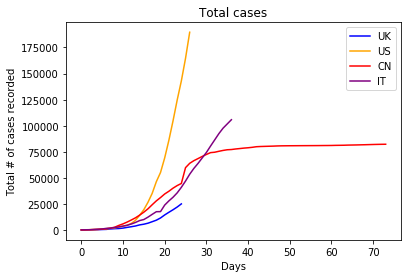

In [39]:
x_uk = df_UK.index
y_uk = df_UK['T_Cases']

x_us = df_US.index
y_us = df_US['T_Cases']

x_cn = df_CN.index
y_cn = df_CN['T_Cases']

x_it = df_IT.index
y_it = df_IT['T_Cases']

plt.title('Total cases')
plt.xlabel('Days')
plt.ylabel('Total # of cases recorded')

plt.plot(x_uk,y_uk, color='blue', label='UK')
plt.plot(x_us,y_us, color='orange', label='US')
plt.plot(x_cn,y_cn, color='red', label='CN')
plt.plot(x_it,y_it, color='purple', label='IT')

plt.legend()

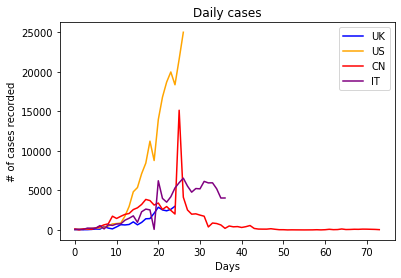

In [40]:
x_uk = df_UK.index
y_uk = df_UK['cases']

x_us = df_US.index
y_us = df_US['cases']

x_cn = df_CN.index
y_cn = df_CN['cases']

x_it = df_IT.index
y_it = df_IT['cases']

plt.title('Daily cases')
plt.xlabel('Days')
plt.ylabel('# of cases recorded')

plt.plot(x_uk,y_uk, color='blue', label='UK')
plt.plot(x_us,y_us, color='orange', label='US')
plt.plot(x_cn,y_cn, color='red', label='CN')
plt.plot(x_it,y_it, color='purple', label='IT')

plt.legend()